In [154]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# get temperature from filename

In [155]:
# to get all filenames with extension .z in working directory
# filenames = os.listdir()
list_of_files = os.listdir()
filename = []
for file in list_of_files:
    if file.endswith(".z"):
        filename.append(str.split(file, '.')[0])    # splits into a list at the '.', gets data at index 0
print(filename)

['292', '343', '446']


# import impedance files into dict of dataframes

In [156]:
list_of_filenames = []
column_names = ['Freq', 'Ampl', 'Bias', 'Time(Sec)', 'Real(Z)', '-Im(Z)', 'GD', 'Err', 'Range']
data_frames = {}
for file in os.listdir():
    if file.endswith('.z'):
        filename = str.split(file, '.')[0]
        list_of_filenames.append(filename)
        df = pd.read_csv(file, skiprows=10, sep=',', names=column_names)
        data_frames[filename] = df.abs()
#         df.rename(columns={0: temperature}, inplace=True)

# Remove unused columns
unused_columns = ['Ampl', 'Bias', 'Time(Sec)', 'GD', 'Err', 'Range']
for column in unused_columns:
    for df in data_frames:
        data_frames[df].drop(column, axis=1, inplace=True)

In [159]:
# normalize by sample dimension

diameter = float(input("sample diameter (cm)? "))
thickness = float(input("sample thickness (cm)? "))
geometric_factor = (np.pi*diameter**2/4)/thickness

for df in data_frames:
    data_frames[df]['Real(Z)'] = data_frames[df]['Real(Z)'] / geometric_factor    # normalizes impedance by geometric factor
    data_frames[df]['-Im(Z)'] = data_frames[df]['-Im(Z)'] / geometric_factor
    data_frames[df]['log_freq'] = np.log10(data_frames[df]['Freq']).round(1)    # adds a new column to each dataframe with log(f)
    
# data_frames['292'].head()

sample diameter (cm)? 1
sample thickness (cm)? 11


In [160]:
# Grab DataFrame rows where column has integer values
# and creates new dataframe

integers = range(-1,7,1)
log_freq_df = {}

for df in data_frames:
    log_freq_df[df] = data_frames[df][data_frames[df].log_freq.isin(integers)]

In [164]:
print(log_freq_df['292'].head())

          Freq         Real(Z)          -Im(Z)  log_freq
5   1036500.00      499.665034    13857.735487         6
18   103650.00    10957.868761   134811.239616         5
31    10365.00   480267.229514  1045128.494380         4
44     1036.50  2825776.916003   810856.237867         3
57      103.65  3375358.033093   414664.835211         2


# Plotting

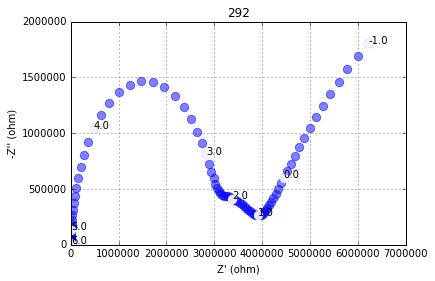

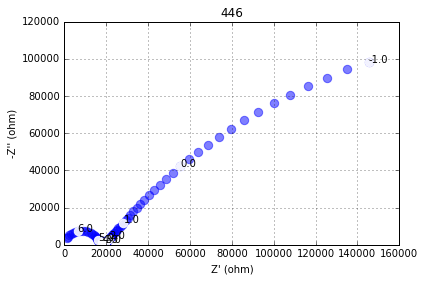

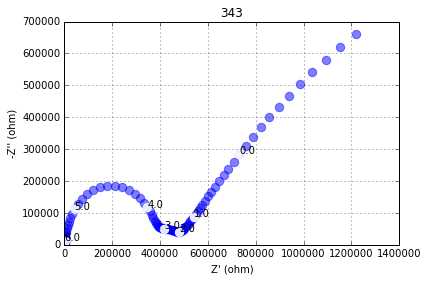

In [172]:
# to create pannel use this instead
# fig = plt.figure()
# for index,df in enumerate(data_frames):
#     ax = fig.add_subplot(2,2,index+1)


for df in data_frames:
    temperature = df
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(data_frames[df]['Real(Z)'], data_frames[df]['-Im(Z)'].abs(), 
            color='blue',
            alpha=0.5,
            s=70)
    ax.scatter(log_freq_df[df]['Real(Z)'], log_freq_df[df]['-Im(Z)'].abs(), 
            color='white',
            alpha=0.9,
            s=70)
    plt.xlabel('Z\' (ohm)')
    plt.ylabel('-Z\'\' (ohm)')
    plt.title(temperature)
    plt.grid(True)
    plt.axis(xmin=0, ymin=0) 
    
    # annotations
    x_ann = log_freq_df[df]['Real(Z)'].tolist()    # gets column 'Real('Z') into a list
    y_ann = log_freq_df[df]['-Im(Z)'].tolist()
    label = log_freq_df[df]['log_freq'].tolist()

    for i in range(len(x_ann)):
        plt.text(x_ann[i], y_ann[i], label[i])
plt.show()

In [127]:
if __name__ == "__main__":

SyntaxError: unexpected EOF while parsing (<ipython-input-127-a3a55b2bf061>, line 1)